# Análise de Venda de Medicamentos Controlados e Antimicrobianos - Medicamentos Industrializados

Projeto de análise de vendas de medicamentos controlados e antimicrobianos exclusivamente industrializados na Região Metropolitana da Baixada Santista (RMBS) composta por nove municípios no litoral do estado de São Paulo, através de dados extraídos do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC) e disponibilizados no [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados) da Agência Nacional de Vigilância Sanitária (Anvisa). Através da análise das informações de vendas, dados geográricos, perfil de pacientes e características de medicamentos, aplicando a metodologia CRISP-DM, o objetivo é extrair insights de negócios, sugerir soluções aos problemas identificados e apresentar propostas de aprimoramento.

## Demanda do negócio

A análise dos dados possibilitará a obtenção de insigths, a identificação de tendências e a proposição de soluções estratégicas. Além disso, esse processo permitirá direcionar recursos de forma mais eficaz para áreas de maior demanda, aprimorando, assim, a gestão logística e o controle de estoque. Para atender a esses objetivos, foi definida as seguintes demandas de negócio:

- Compreender as tendências, padrões e características das vendas farmacêuticas.
- Construção de perfis de pacientes com base nos mendicamentos receitados.
- Compreender a demanda de medicamentos com base no perfil dos pacientes, por tempo e por município.
- Obter insights, identificar oportunidades e propor soluções a problemas.
- Elaboração de painel de informações de medicamentos baseado em filtros.

## Compreensão dos dados

Os dados que serão utilizados na análise compreendem o período de uma ano, outubro de 2020 até setembro de 2021, que integram um conjunto de doze arquivos em formato "CSV". Os dados foram extraídos do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC), provenientes apenas de farmácias e drogarias privadas que periodicamente devem enviar os dados a respeito de todas as vendas realizadas de medicamentos sujeitos à escrituração no SNGPC. Os dados foram disponibilizados no [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados) da Agência Nacional de Vigilância Sanitária (Anvisa).

## Tópicos da análise

- Construção de perfil de pacientes.
- Distribuição de pacientes por município.
- Demanda de medicamentos por paciente.
- Demanda de medicamentos por município.
- Demanda de medicamentos durante o ano.

## Dicionário de dados

**ANO_VENDA:** Ano da venda do medicamento.<br>
**MES_VENDA:** Mês da venda do medicamento.<br>
**UF_VENDA:** Unidade Federativa do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando a UF onde ocorreu a venda.<br>
**MUNICIPIO_VENDA:** Município do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando o Município onde ocorreu a venda.<br>
**PRINCIPIO_ATIVO:** Nome do princípio ativo do medicamento industrializado, conforme cadastrado no registro do medicamento, no banco de dados da Anvisa.<br>Quando um medicamento tem mais de um princípio ativo, cada um deles é separado pelo caractere “+”.<br>Ex.: “PRINCÍPIO ATIVO 1 + PRINCÍPIO ATIVO 2”<br>
**DESCRICAO_APRESENTACAO:** Uma Apresentação de Medicamento representa O modo como um medicamento é apresentado na embalagem. Exemplo: Medicamento X, pode ter duas apresentações diferentes:<br>• Apresentação 1:<br>Uma caixa com 1 blister de alumínio com 20 comprimidos, cada comprimido com 5 mg de princípio ativo.<br>Nesse caso, a descrição da apresentação seria:<br>“5 MG COM CT BL AL X 20”<br>• Apresentação 2:<br>Uma caixa com 1 frasco de vidro com 50 mL de um xarope, com concentração do princípio ativo de 15 mg por mL.<br>Nesse caso, a descrição da apresentação seria:<br>15MG/ML XPE CT FR VD x 50 ML<br>Esses exemplos representam descrições de apresentações diferentes para um mesmo medicamento.<br>Os termos utilizados na descrição das apresentações seguem o disposto no Vocabulário Controlado da Anvisa, disponível no link:<br>[http://portal.anvisa.gov.br/documents/33836/2501339/Vocabul%C3%A1rio+Controlado/fd8fdf08-45dc-402a-8dcf-fbb3fd21ca75](http://portal.anvisa.gov.br/documents/33836/2501339/Vocabul%C3%A1rio+Controlado/fd8fdf08-45dc-402a-8dcf-fbb3fd21ca75)<br>
**QTD_VENDIDA:** Quantidade vendida de caixas ou frascos do medicamento.<br>
**UNIDADE_MEDIDA:** Indica se a quantidade vendida do medicamento foi de caixas ou frascos.<br>
**CONSELHO_PRESCRITOR:** Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**UF_CONSELHO_PRESCRITOR:** Unidade Federativa do Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**TIPO_RECEITUARIO:** Tipo de receituário utilizado na prescrição.<br>Valores e respectivos tipos de receituário:<br>1 – Receita de Controle Especial em 2 vias (Receita Branca);<br>2 – Notificação de Receita B (Notificação Azul);<br>3 – Notificação de Receita Especial (Notificação Branca);<br>4 – Notificação de Receita A (Notificação Amarela);<br>5 – Receita Antimicrobiano em 2 vias.<br>
**CID10:** Classificação Internacional de Doença (aplicável apenas a medicamentos antimicrobianos).<br>
**SEXO:** Sexo do paciente (aplicável apenas a medicamentos antimicrobianos).<br>Valor 1 para o sexo masculino, valor 2 para o sexo feminino.<br>
**IDADE:** Valor numérico que representa a idade do paciente, em meses ou anos (aplicável apenas a medicamentos antimicrobianos).<br>
**UNIDADE_IDADE:** Unidade de medida da idade do paciente, que pode ser em meses ou anos (aplicável apenas a medicamentos antimicrobianos).<br>Valor 1 para unidade de medida em anos, valor 2 para unidade de medida em meses.<br>

## Sumário

---


## 1. Importação de bibliotecas


In [76]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import funcoes as fn

from tabulate import tabulate
from statistics import mode

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

## 2. Carregamento dos dados


In [77]:
# Efetuando a limpeza de memória antes do carregamento dos dados
gc.collect()

# Caminho do arquivo de dados
caminho = 'dados/ABT/00/'

# Criando um dataframe a partir dos arquivos no diretório de dados
df = pd.read_parquet(caminho, engine='pyarrow')

## 3. Análise do dataframe


In [78]:
# Informações do dataframe como nome das colunas, contagem de
# de dados, tipo de dados e quantidade de memória utilizada

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736196 entries, 0 to 736195
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ANO_VENDA               736196 non-null  int32   
 1   MES_VENDA               736196 non-null  int32   
 2   UF_VENDA                736196 non-null  object  
 3   MUNICIPIO_VENDA         736196 non-null  object  
 4   PRINCIPIO_ATIVO         735816 non-null  object  
 5   DESCRICAO_APRESENTACAO  736196 non-null  object  
 6   QTD_VENDIDA             736196 non-null  int32   
 7   UNIDADE_MEDIDA          736196 non-null  object  
 8   CONSELHO_PRESCRITOR     736196 non-null  object  
 9   UF_CONSELHO_PRESCRITOR  736196 non-null  object  
 10  TIPO_RECEITUARIO        736196 non-null  object  
 11  CID10                   49 non-null      object  
 12  SEXO                    615105 non-null  float64 
 13  IDADE                   615105 non-null  float64 
 14  UNID

In [79]:
print(f'\nQuantidade de linhas (registros):  {df.shape[0]}')
print(f'\nQuantidade de colunas (variáveis): {df.shape[1]}')


Quantidade de linhas (registros):  736196

Quantidade de colunas (variáveis): 17


In [80]:
# Agrupar os dados por ano/mês e exibir a quantidade de registros
df_ano_mes = df.groupby(['ANO_VENDA', 'MES_VENDA']).size()
df_ano_mes = pd.DataFrame(df_ano_mes)
df_ano_mes.rename(columns={0: 'Quantidade'}, inplace=True)
df_ano_mes['%'] = df_ano_mes['Quantidade']/df_ano_mes['Quantidade'].sum()*100

df_ano_mes

Quantidade         %
ANO_VENDA MES_VENDA                      
2020      10              61346  8.332835
          11              61844  8.400480
          12              63109  8.572310
2021      1               65856  8.945444
          2               59813  8.124603
          3               66270  9.001679
          4               56797  7.714929
          5               59675  8.105858
          6               59026  8.017702
          7               60118  8.166032
          8               60468  8.213574
          9               61874  8.404555

In [81]:
# Primeiras linhas do dataframe

df.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
0,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,69.0,1.0,2024-01-09,2020-10-01
1,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,73.0,1.0,2024-01-09,2020-10-01
2,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,78.0,1.0,2024-01-09,2020-10-01
3,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,2.0,18.0,1.0,2024-01-09,2020-10-01
4,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,2.0,38.0,1.0,2024-01-09,2020-10-01


In [82]:
# Últimas linhas do dataframe

df.tail()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
736191,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,6,FRASCO,CRMV,SP,5,None,NaN,NaN,NaN,2024-01-09,2021-09-01
736192,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,1,FRASCO,CRO,SP,5,None,2.0,35.0,1.0,2024-01-09,2021-09-01
736193,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,3,FRASCO,CRO,SP,5,None,2.0,45.0,1.0,2024-01-09,2021-09-01
736194,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,1,FRASCO,CRO,SP,5,None,2.0,91.0,1.0,2024-01-09,2021-09-01
736195,2021,9,SP,SANTOS,None,500 MG COM REV CT 2 BL AL PVDC LEIT X 7,1,CAIXA,CRM,SP,5,None,1.0,22.0,1.0,2024-01-09,2021-09-01


In [83]:
# Exibindo os metadados

fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,ANO_VENDA,int32,0,0.00,2
1,MES_VENDA,int32,0,0.00,12
2,UF_VENDA,object,0,0.00,1
3,MUNICIPIO_VENDA,object,0,0.00,9
4,PRINCIPIO_ATIVO,object,380,0.05,293
5,DESCRICAO_APRESENTACAO,object,0,0.00,1915
6,QTD_VENDIDA,int32,0,0.00,757
7,UNIDADE_MEDIDA,object,0,0.00,2
8,CONSELHO_PRESCRITOR,object,0,0.00,4
9,UF_CONSELHO_PRESCRITOR,object,0,0.00,27


## 4. Limpeza e pré-processamento dos dados


### 4.1. Análise de registros duplicados


In [84]:
# Exibindo a quantidade de registros duplicados

df.duplicated(keep='first').value_counts().to_frame().rename(
    columns={'count': 'Quantidade'})

,Quantidade
False,736196


### 4.2. Análise e tratamento de valores nulos


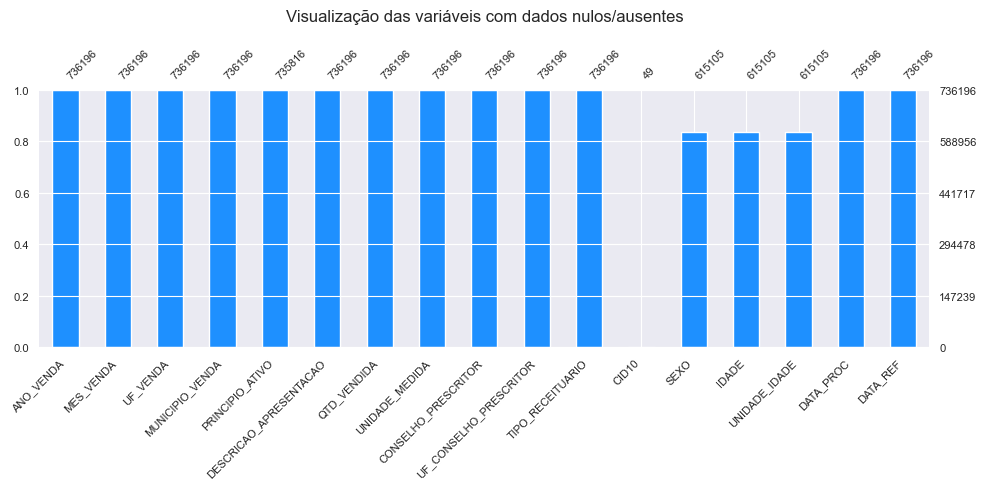

In [85]:
fn.grafico_bar_valores_nulos(df)

* #### Tratando valores nulos da coluna PRINCIPIO_ATIVO

In [86]:
fn.exibe_quantidade_nulos(df,'PRINCIPIO_ATIVO')


Quantidade de registros nulos na coluna PRINCIPIO_ATIVO: 380 (0.05 %)


In [87]:
# Cria um dataframe somente com os registros onde o valor da coluna PRINCIPIO_ATIVO
# é nulo e a coluna 'DESCRICAO_APRESENTACAO' não é nulo
df_nulls = df[df['PRINCIPIO_ATIVO'].isnull() & ~df['DESCRICAO_APRESENTACAO'].isnull()]
# Cria e exibe a quantidade de valores nulos da coluna PRINCIPIO_ATIVO com base no
# agrupamento com a coluna 'DESCRICAO_APRESENTACAO'
df_nulls = df_nulls.groupby(['DESCRICAO_APRESENTACAO']).size() \
    .reset_index(name='Quantidade')
df_nulls

,DESCRICAO_APRESENTACAO,Quantidade
0,10 MG COM REV CT BL AL/AL X 30,29
1,10 MG COM REV CT BL AL/AL X 60,13
2,2 MG COM CT 2 BL AL PLAS INC X 15,1
3,20 MG COM REV CT BL AL/AL X 30,5
4,250 MG COM REV CT 5 BL AL/AL X 2,1
5,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,183
6,"37,5 MG CAP GEL DURA LIB PROL CT BL PLAS OPC X 30",15
7,50 MG COM CX 2 BL AL PLAS INC X 15,5
8,500 MG CAP GEL DURA CT 2 BL AL PLAS INC X 4,8
9,500 MG COM REV CT 2 BL AL PVDC LEIT X 7,3


In [88]:
# Salvando os valores únicos da coluna DESCRICAO_APRESENTACAO
arr = np.unique(df_nulls['DESCRICAO_APRESENTACAO'])
# Com base nos valores da coluna DESCRICAO_APRESENTACAO os valores nulos da coluna
# PRINCIPIO_ATIVO são substituídos pela sua moda
for a in arr:
    try:
        df_temp = df[df['DESCRICAO_APRESENTACAO'] == a]
        moda_principio_ativo = df_temp['PRINCIPIO_ATIVO'].mode()[0]
        df.loc[(df['DESCRICAO_APRESENTACAO'] == a) &
               (df['PRINCIPIO_ATIVO'].isnull()), 'PRINCIPIO_ATIVO'] = moda_principio_ativo
    except:
        continue

fn.exibe_quantidade_nulos(df,'PRINCIPIO_ATIVO')


Quantidade de registros nulos na coluna PRINCIPIO_ATIVO: 68 (0.01 %)


In [89]:
# Apagando os registros nulos restantes
df = df.dropna(subset=['PRINCIPIO_ATIVO'])

fn.exibe_quantidade_nulos(df,'PRINCIPIO_ATIVO')


Quantidade de registros nulos na coluna PRINCIPIO_ATIVO: 0 (0.0 %)


* #### Tratando valores nulos da coluna CID10

In [90]:
fn.exibe_quantidade_nulos(df,'CID10')


Quantidade de registros nulos na coluna CID10: 736079 (99.99 %)


In [91]:
# Apagando a coluna CID10
df = df.drop(columns='CID10')

fn.exibe_quantidade_nulos(df,'CID10')


Coluna CID10 não existe ou foi apagada.


* #### Tratando valores nulos da coluna SEXO

In [92]:
fn.exibe_quantidade_nulos(df,'SEXO')


Quantidade de registros nulos na coluna SEXO: 121052 (16.44 %)


In [93]:
# Cria um dataframe somente com os registros onde o valor da coluna SEXO
# é nulo e a coluna 'CONSELHO_PRESCRITOR' não é nulo
df_nulls = df[df['SEXO'].isnull() & ~df['CONSELHO_PRESCRITOR'].isnull()]
# Cria e exibe a quantidade de valores nulos da coluna SEXO com base no
# agrupamento com a coluna 'CONSELHO_PRESCRITOR'
df_nulls = df_nulls.groupby(['CONSELHO_PRESCRITOR']).size() \
    .reset_index(name='Quantidade')
df_nulls

,CONSELHO_PRESCRITOR,Quantidade
0,CRM,88796
1,CRMV,19748
2,CRO,9301
3,RMS,3207


In [94]:
# Com base no valor CRMV da coluna CONSELHO_PRESCRITOR os valores nulos da 
# coluna SEXO são substituídos pelo valor 3
df.loc[(df['CONSELHO_PRESCRITOR'] == 'CRMV')
       & (df['SEXO'].isnull()), 'SEXO'] = 3

fn.exibe_quantidade_nulos(df,'SEXO')


Quantidade de registros nulos na coluna SEXO: 101304 (13.76 %)


In [95]:
# Com base na coluna SEXO os valores nulos são substituídos pela sua moda
moda_sexo = df['SEXO'].mode()[0]
df['SEXO'].fillna(moda_sexo, inplace=True)

fn.exibe_quantidade_nulos(df,'SEXO')


Quantidade de registros nulos na coluna SEXO: 0 (0.0 %)


* #### Tratando valores nulos da coluna IDADE

In [96]:
fn.exibe_quantidade_nulos(df,'IDADE')


Quantidade de registros nulos na coluna IDADE: 121052 (16.44 %)


In [97]:
# Cria um dataframe somente com os registros onde o valor da coluna IDADE
# é nulo e a coluna 'SEXO' não é nulo
df_nulls = df[df['IDADE'].isnull() & ~df['CONSELHO_PRESCRITOR'].isnull()]
# Cria e exibe a quantidade de valores nulos da coluna IDADE com base no
# agrupamento com a coluna 'SEXO'
df_nulls = df_nulls.groupby(['SEXO']).size() \
    .reset_index(name='Quantidade')
df_nulls

,SEXO,Quantidade
0,1.0,101304
1,3.0,19748


In [98]:
# Com base no valor 3 da coluna SEXO os valores nulos da 
# coluna IDADE são substituídos pelo valor -1
df.loc[df['SEXO'] == 3, 'IDADE'] = -1
media_idade = df['IDADE'].median()
df['IDADE'].fillna(media_idade, inplace=True)

fn.exibe_quantidade_nulos(df,'IDADE')


Quantidade de registros nulos na coluna IDADE: 0 (0.0 %)


* #### Tratando valores nulos da coluna UNIDADE_IDADE

In [99]:
fn.exibe_quantidade_nulos(df,'UNIDADE_IDADE')


Quantidade de registros nulos na coluna UNIDADE_IDADE: 121052 (16.44 %)


In [100]:
# Com base no valor 2 da coluna UNIDADE_IDADE os valores da 
# coluna IDADE são substituídos pela divisão de IDADE por 12
df.loc[df['UNIDADE_IDADE'] == 2, 'IDADE'] /= 12

In [101]:
# Apagando a coluna UNIDADE_IDADE
df = df.drop(columns='UNIDADE_IDADE')

fn.exibe_quantidade_nulos(df,'UNIDADE_IDADE')


Coluna UNIDADE_IDADE não existe ou foi apagada.


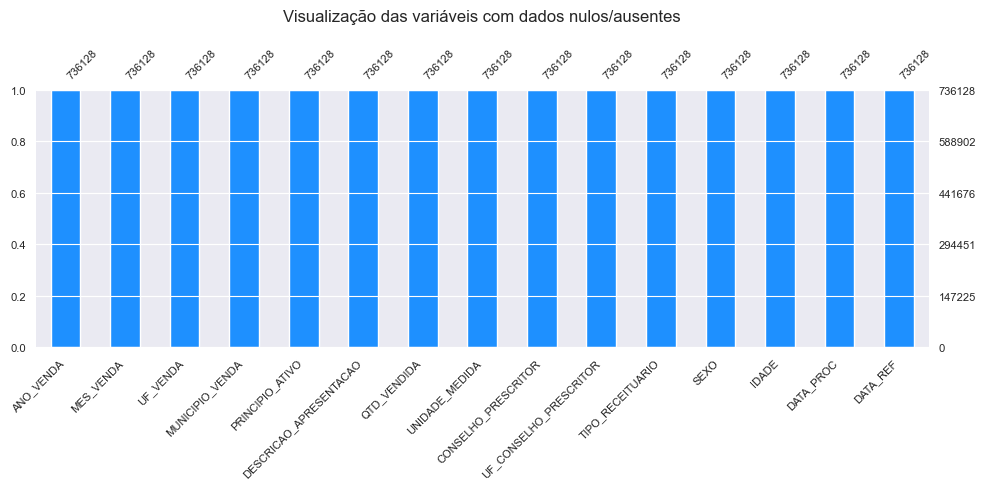

In [102]:
fn.grafico_bar_valores_nulos(df)

### 4.3. Análise de tipo dos dados

In [103]:
# Listando os tipos dos dados

df.dtypes.to_frame().rename(columns={0: 'Tipo'})

,Tipo
ANO_VENDA,int32
MES_VENDA,int32
UF_VENDA,object
MUNICIPIO_VENDA,object
PRINCIPIO_ATIVO,object
DESCRICAO_APRESENTACAO,object
QTD_VENDIDA,int32
UNIDADE_MEDIDA,object
CONSELHO_PRESCRITOR,object
UF_CONSELHO_PRESCRITOR,object


In [104]:
# Transformando os tipos dos dados e ajustando formatos

df['ANO_VENDA'] = df['ANO_VENDA'].astype('int32')

df['MES_VENDA'] = df['MES_VENDA'].astype('int8')

df['SEXO'] = df['SEXO'].map({1: 'Masculino', 2: 'Feminino', 3:'Não declarado'})

df['TIPO_RECEITUARIO'] = df['TIPO_RECEITUARIO'].astype('int8')

df['DATA_PROC'] = pd.to_datetime(df['DATA_PROC'])

df['DATA_REF'] = df['DATA_REF'].str.strip()
df['DATA_REF'] = pd.to_datetime(df['DATA_REF'], format='%Y-%m-%d', errors='coerce')

In [105]:
fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,ANO_VENDA,int32,0,0.0,2
1,MES_VENDA,int8,0,0.0,12
2,UF_VENDA,object,0,0.0,1
3,MUNICIPIO_VENDA,object,0,0.0,9
4,PRINCIPIO_ATIVO,object,0,0.0,293
5,DESCRICAO_APRESENTACAO,object,0,0.0,1906
6,QTD_VENDIDA,int32,0,0.0,757
7,UNIDADE_MEDIDA,object,0,0.0,2
8,CONSELHO_PRESCRITOR,object,0,0.0,4
9,UF_CONSELHO_PRESCRITOR,object,0,0.0,27


### 4.4. Análise da cardinalidade


In [106]:
def exibe_valores_unicos(df, colunas, qtde_unicos):
    '''
    Exibe a quantidade de valores únicos de coluna(s) específica(s)

    :param df: DataFrame
        DataFrame a ser analisado.
    :param colunas: list
        Lista de colunas a ser analisada.
    :param qtde_unicos: int
        Quantidade máxima de valores únicos para exibição.
    :return: None
    '''
    for col in colunas:
        if df[col].nunique() <= qtde_unicos:
            coluna_qtde = pd.DataFrame(df[col].value_counts().sort_index())
            coluna_qtde = coluna_qtde.rename(columns={col: 'Quantidade'})
            coluna_qtde = coluna_qtde.T
            display(coluna_qtde)

cols = df.columns
qtde_unicos = 12

exibe_valores_unicos(df, cols, qtde_unicos)

ANO_VENDA,2020,2021
count,186278,549850


MES_VENDA,1,2,3,4,5,6,7,8,9,10,11,12
count,65849,59809,66261,56793,59672,59024,60112,60464,61866,61342,61838,63098


UF_VENDA,SP
count,736128


MUNICIPIO_VENDA,BERTIOGA,CUBATÃO,GUARUJÁ,ITANHAÉM,MONGAGUÁ,PERUÍBE,PRAIA GRANDE,SANTOS,SÃO VICENTE
count,34642,41301,94772,42733,32739,44897,126250,214309,104485


UNIDADE_MEDIDA,CAIXA,FRASCO
count,651214,84914


CONSELHO_PRESCRITOR,CRM,CRMV,CRO,RMS
count,626285,19748,85618,4477


TIPO_RECEITUARIO,1,2,3,4,5
count,103093,14531,2353,2825,613326


SEXO,Feminino,Masculino,Não declarado
count,253768,462612,19748


DATA_PROC,2024-01-09
count,736128


DATA_REF,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01
count,61342,61838,63098,65849,59809,66261,56793,59672,59024,60112,60464,61866


In [107]:
fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,ANO_VENDA,int32,0,0.0,2
1,MES_VENDA,int8,0,0.0,12
2,UF_VENDA,object,0,0.0,1
3,MUNICIPIO_VENDA,object,0,0.0,9
4,PRINCIPIO_ATIVO,object,0,0.0,293
5,DESCRICAO_APRESENTACAO,object,0,0.0,1906
6,QTD_VENDIDA,int32,0,0.0,757
7,UNIDADE_MEDIDA,object,0,0.0,2
8,CONSELHO_PRESCRITOR,object,0,0.0,4
9,UF_CONSELHO_PRESCRITOR,object,0,0.0,27


## 5. Análise das medidas estatísticas dos dados


In [108]:
# Estatística descritiva das variáveis numéricas

df.describe().T

,count,mean,min,25%,50%,75%,max,std
ANO_VENDA,736128.0,2020.746949,2020.0,2020.0,2021.0,2021.0,2021.0,0.43476
MES_VENDA,736128.0,6.488043,1.0,3.0,7.0,10.0,12.0,3.490513
QTD_VENDIDA,736128.0,4.787557,1.0,1.0,1.0,2.0,32021.0,46.050546
TIPO_RECEITUARIO,736128.0,4.37036,1.0,5.0,5.0,5.0,5.0,1.427795
IDADE,736128.0,41.894318,-1.0,28.0,42.0,57.0,993.0,23.84059
DATA_PROC,736128,2024-01-09 00:00:00,2024-01-09 00:00:00,2024-01-09 00:00:00,2024-01-09 00:00:00,2024-01-09 00:00:00,2024-01-09 00:00:00,NaN
DATA_REF,736128,2021-03-15 18:37:25.305164544,2020-10-01 00:00:00,2020-12-01 00:00:00,2021-03-01 00:00:00,2021-06-01 00:00:00,2021-09-01 00:00:00,NaN


In [109]:
# Estatística descritiva das variáveis categóricas

cols = df.select_dtypes(include=['object', 'category']).columns
df[cols].describe().T

,count,unique,top,freq
UF_VENDA,736128,1,SP,736128
MUNICIPIO_VENDA,736128,9,SANTOS,214309
PRINCIPIO_ATIVO,736128,293,AZITROMICINA DI-HIDRATADA,85240
DESCRICAO_APRESENTACAO,736128,1906,500 MG CAP DURA CT BL AL PLAS TRANS X 21,29660
UNIDADE_MEDIDA,736128,2,CAIXA,651214
CONSELHO_PRESCRITOR,736128,4,CRM,626285
UF_CONSELHO_PRESCRITOR,736128,27,SP,721745
SEXO,736128,3,Masculino,462612


### 5.1. Distribuição dos dados em gráfico boxplot


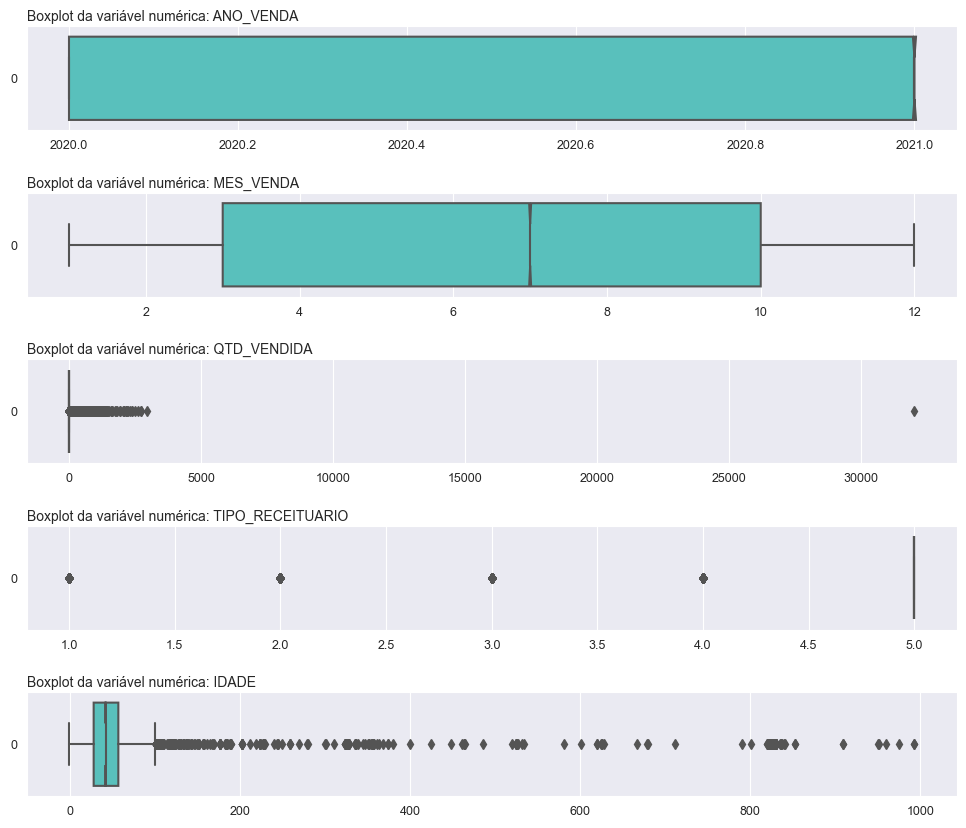

In [110]:
def grupo_graf_boxplot(dataframe):
    '''
    Plota vários boxplots de acordo com o número de colunas.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    '''
    # Selecionar apenas variáveis numéricas
    colunas = dataframe.select_dtypes(include=['number']).columns

    # Calcular a quantidade de subplots necessário
    qtde_subplots = len(colunas)

    # Criar subplots dinamicamente
    fig, axs = plt.subplots(qtde_subplots, 1,
                            figsize=(12, 2 * qtde_subplots), gridspec_kw={'hspace': 0.6})

    # Loop sobre as variáveis numéricas e plotar o gráfico
    for i, col in enumerate(colunas):
        sns.boxplot(data=dataframe[col], ax=axs[i],
                    notch=True, orient='h', color='mediumturquoise')
        # Configurar o título e remover os rótulos dos eixos
        axs[i].set_title(
            f'Boxplot da variável numérica: {col}', loc='left', fontsize=10, pad=4)
        axs[i].set(xlabel='', ylabel='')
        # Ajustar o tamanho dos rótulos
        axs[i].tick_params(labelsize=9)
        # Exibir rótulos sem formatação especial
        axs[i].ticklabel_format(style='plain', axis='x')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()


grupo_graf_boxplot(df)

### 5.2. Análise dos outliers identificados

In [111]:
# Geração dos limites inferior e superior das variáveis que apresentaram outliers

cols = df.select_dtypes(include=['number']).columns

for col in cols:

    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ
    total_limite = ((len(df[(df[col] > (limite_superior))]) +
                    len(df[(df[col] < (limite_inferior))])) / df.shape[0])

    print(f'\n{col.upper()}')
    print(f'Intervalo interquartil: {IIQ}')
    print(f'Limite inferior: {limite_inferior}')
    print(f'Limite superior: {limite_superior}')
    print(f'Os outliers correspondem a {total_limite:.2%} dos dados da variável.')


ANO_VENDA
Intervalo interquartil: 1.0
Limite inferior: 2018.5
Limite superior: 2022.5
Os outliers correspondem a 0.00% dos dados da variável.

MES_VENDA
Intervalo interquartil: 7.0
Limite inferior: -7.5
Limite superior: 20.5
Os outliers correspondem a 0.00% dos dados da variável.

QTD_VENDIDA
Intervalo interquartil: 1.0
Limite inferior: -0.5
Limite superior: 3.5
Os outliers correspondem a 17.40% dos dados da variável.

TIPO_RECEITUARIO
Intervalo interquartil: 0.0
Limite inferior: 5.0
Limite superior: 5.0
Os outliers correspondem a 16.68% dos dados da variável.

IDADE
Intervalo interquartil: 29.0
Limite inferior: -15.5
Limite superior: 100.5
Os outliers correspondem a 0.08% dos dados da variável.


In [112]:
# Exibindo os valores dos outliers com base nas informações da análise anterior

fn.valores_outliers(df,'IDADE', 100.5, '>')


IDADE: [101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 114. 115. 116.
 117. 118. 119. 120. 121. 122. 123. 124. 125. 127. 128. 130. 131. 133.
 134. 137. 138. 139. 140. 142. 143. 144. 146. 147. 149. 151. 152. 156.
 157. 158. 161. 165. 167. 168. 169. 177. 183. 184. 185. 188. 189. 202.
 212. 219. 223. 224. 227. 228. 230. 240. 243. 245. 250. 259. 270. 279.
 280. 300. 301. 310. 323. 324. 325. 326. 327. 328. 335. 336. 337. 339.
 345. 347. 350. 352. 354. 355. 356. 357. 358. 361. 363. 368. 374. 380.
 400. 425. 448. 461. 463. 465. 486. 520. 524. 526. 527. 532. 534. 581.
 601. 620. 625. 626. 628. 667. 678. 680. 712. 790. 801. 820. 821. 822.
 823. 824. 825. 826. 827. 828. 829. 830. 835. 836. 837. 840. 841. 852.
 909. 950. 951. 959. 975. 993.]


In [113]:
# Exibindo os valores dos outliers com base nas informações da análise anterior

fn.valores_outliers(df,'QTD_VENDIDA', 3.5, '>')


QTD_VENDIDA: [    4     5     6     7     8     9    10    11    12    13    14    15
    16    17    18    19    20    21    22    23    24    25    26    27
    28    29    30    31    32    33    34    35    36    37    38    39
    40    41    42    43    44    45    46    47    48    49    50    51
    52    53    54    55    56    57    58    59    60    61    62    63
    64    65    66    67    68    69    70    71    72    73    74    75
    76    77    78    79    80    81    82    83    84    85    86    87
    88    89    90    91    92    93    94    95    96    97    98    99
   100   101   102   103   104   105   106   107   108   109   110   111
   112   113   114   115   116   117   118   119   120   121   122   123
   124   125   126   127   128   129   130   131   132   133   134   135
   136   137   138   139   140   141   142   143   144   145   146   147
   148   149   150   151   152   153   154   155   156   157   158   159
   160   161   162   163   164   165 

### 5.3. Distribuição dos dados em gráfico histograma

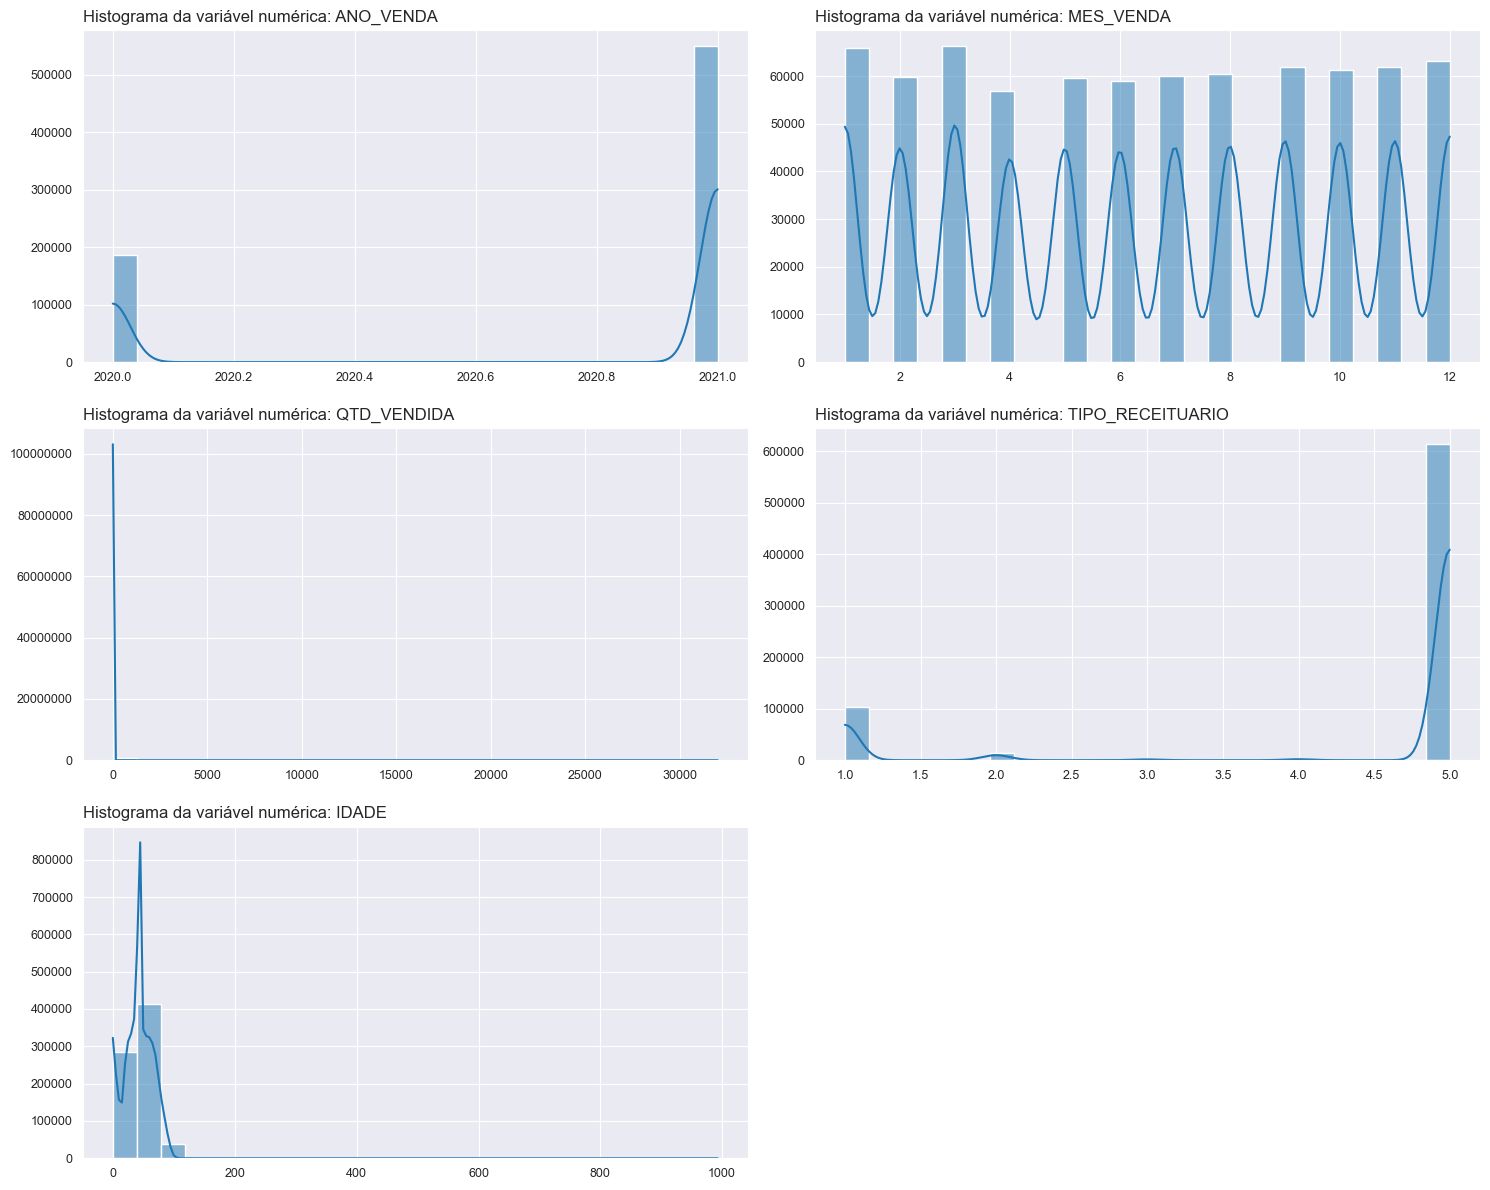

In [114]:
def grupo_graf_histplot(dataframe):
    '''
    Função para gerar gráficos histplot para variáveis numéricas do DataFrame.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    '''
    # Selecionar apenas variáveis numéricas
    colunas = dataframe.select_dtypes(include=['number']).columns

    # Calcular a quantidade de subplots necessário
    qtde_subplots = len(colunas)

    # Definir o número de colunas desejado (neste caso, 2)
    colunas_subplot = 2

    # Calcular o número de linhas necessário
    qtde_linhas = -(-qtde_subplots // colunas_subplot)

    # Criar subplots dinamicamente
    fig, axs = plt.subplots(qtde_linhas, colunas_subplot, figsize=(15, 4 * qtde_linhas))

    # Flattening do array de subplots para facilitar o loop
    axs = axs.flatten()
    
        # Remover subplots não utilizados
    for i in range(qtde_subplots, qtde_linhas * colunas_subplot):
        fig.delaxes(axs[i])

    # Loop sobre as variáveis numéricas e plotar o gráfico
    for i, col in enumerate(colunas):
        sns.histplot(data=dataframe, x=col, ax=axs[i], bins=25, kde=True)

        # Configurar o título e remover os rótulos dos eixos
        axs[i].set_title(f'Histograma da variável numérica: {col}', loc='left')
        # Remover rótulos dos eixos
        axs[i].set(xlabel='', ylabel='')
        # Ajustar o tamanho dos rótulos
        axs[i].tick_params(labelsize=9)
        # Exibir rótulos sem formatação especial
        axs[i].ticklabel_format(style='plain', axis='y')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    plt.show()

grupo_graf_histplot(df)


### 5.4. Distribuição dos dados em gráfico de barras

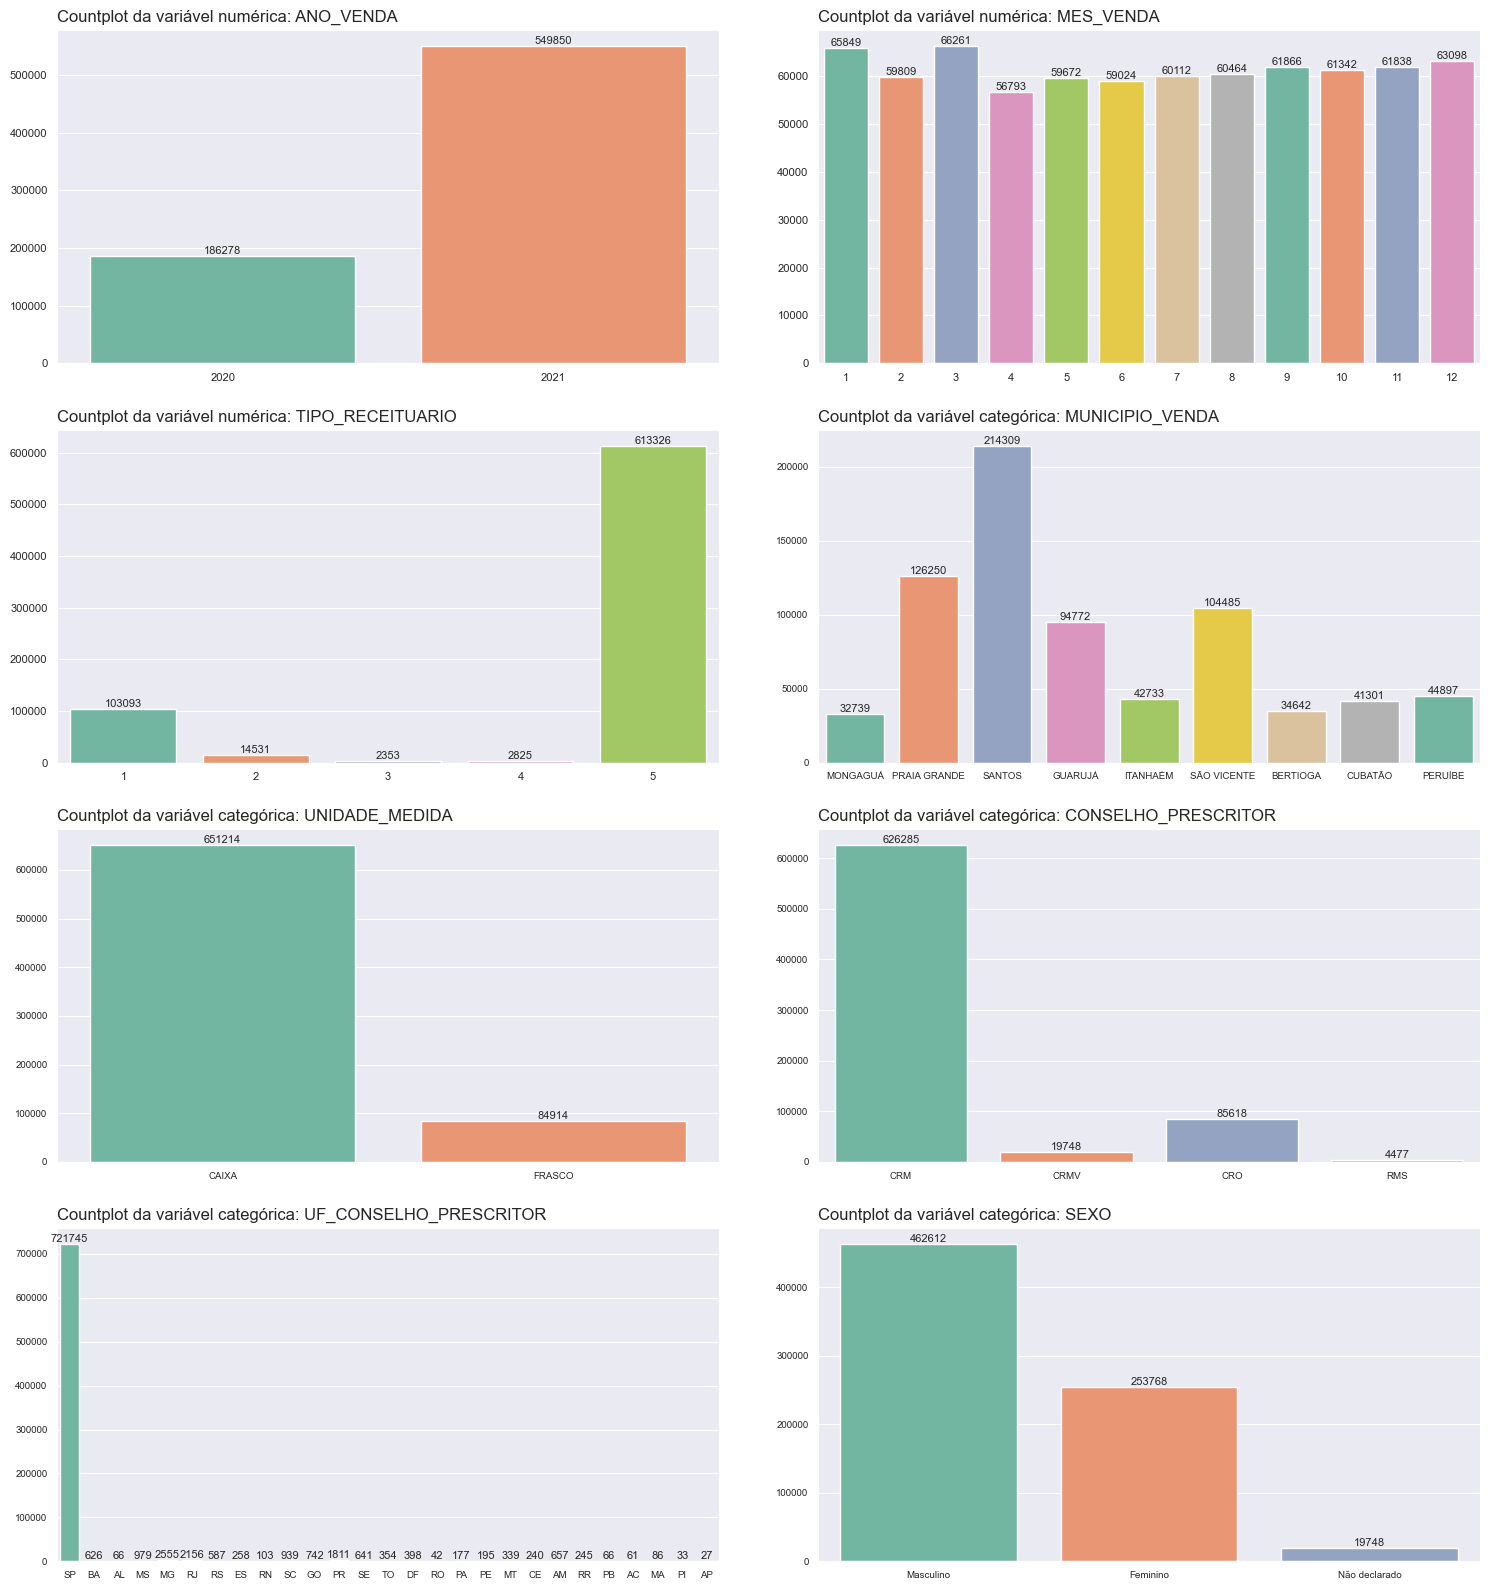

In [115]:
def grupo_graf_countplot(dataframe, cardinalidade_limite=50, ncols=2):
    '''
    Função para gerar gráficos de barras (countplot e barplot) para variáveis numéricas e categóricas do DataFrame.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    :param cardinalidade_limite: int, optional
        Limite de cardinalidade para considerar uma variável como categórica.
    :param ncols: int, optional
        Número de colunas para dispor os subplots.        
    '''
    # Separar variáveis numéricas e categóricas
    colunas_numericas = dataframe.select_dtypes(include=['number']).columns
    colunas_categoricas = dataframe.select_dtypes(exclude=['number','datetime']).columns

    # Filtrar apenas as variáveis categóricas com cardinalidade abaixo ou igual ao limite
    colunas_numericas_filtradas = [col for col in colunas_numericas if 1 < len(
        dataframe[col].unique()) <= cardinalidade_limite]
    colunas_categoricas_filtradas = [col for col in colunas_categoricas if 1 < len(
        dataframe[col].unique()) <= cardinalidade_limite]

    # Calcular a quantidade de subplots necessário
    qtde_subplots = len(colunas_numericas_filtradas) + \
        len(colunas_categoricas_filtradas)

    # Calcular o número de linhas
    nrows = (qtde_subplots + ncols - 1) // ncols

    # Criar subplots dinamicamente com layout ajustado
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 2 * qtde_subplots))

    # Achatar a lista de subplots se for bidimensional
    axs = axs.flatten() if nrows > 1 else [axs]

    # Remover subplots não utilizados
    for i in range(qtde_subplots, nrows * ncols):
        fig.delaxes(axs[i])

    # Loop sobre as variáveis numéricas filtradas e plotar o gráfico
    for i, col in enumerate(colunas_numericas_filtradas):
        # Plotar gráficos apenas para variáveis numéricas
        axs[i] = sns.countplot(data=dataframe, x=col, ax=axs[i], palette='Set2')
        axs[i].set_title(f'Countplot da variável numérica: {col}', loc='left')
        axs[i].set(xlabel='', ylabel='')
        axs[i].tick_params(labelsize=8)
        axs[i].ticklabel_format(style='plain', axis='y')
        
        # Adicionar rótulos (valores) nas barras
        for container in axs[i].containers:
            axs[i].bar_label(container, size=8)

    # Loop sobre as variáveis categóricas filtradas e plotar o gráfico
    for i, col in enumerate(colunas_categoricas_filtradas):
        axs[len(colunas_numericas_filtradas) + i] = sns.countplot(data=dataframe, x=col,
                      ax=axs[len(colunas_numericas_filtradas) + i], palette='Set2')
        axs[len(colunas_numericas_filtradas) +
            i].set_title(f'Countplot da variável categórica: {col}', loc='left')
        axs[len(colunas_numericas_filtradas) + i].set(xlabel='', ylabel='')
        axs[len(colunas_numericas_filtradas) + i].tick_params(labelsize=7)

        # Adicionar rótulos (valores) nas barras
        for container in axs[len(colunas_numericas_filtradas) + i].containers:
            axs[len(colunas_numericas_filtradas) + i].bar_label(container, size=8)

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.15, hspace=0.2)
    plt.show()


grupo_graf_countplot(df)

## 6. Análise exploratória dos dados

### 6.1. Construção de perfil de pacientes

* #### Qual é a faixa etária média dos pacientes que compram medicamentos controlados?

In [116]:
# Agrupar idades numéricas em faixas etárias

# Não declarado - medicação receitada por um veterinário
# 00_00 - até 11 meses
# 01_05 - de 01 a 05 anos
# 06_12 - de 06 a 12 anos
# 13_17 - de 18 a 24 anos
# 18_24 - de 25 a 34 anos
# 25_44 - de 35 a 44 anos
# 45_64 - de 45 a 64 anos
# 65_More - maior ou igual a 65 anos

faixa = [-1, 0, 1, 6, 13, 18, 25, 45, 65, df['IDADE'].max()]
rotulos = ['Não declarado',
           '00_00',
           '01_05',
           '06_12',
           '13_17',
           '18_24',
           '25_44',
           '45_64',
           '65_Mais']

df['FAIXA_ETARIA'] = pd.cut(df['IDADE'], bins=faixa,
                            labels=rotulos, right=False)
df = pd.DataFrame(df)
df.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,DATA_PROC,DATA_REF,FAIXA_ETARIA
0,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,Masculino,69.0,2024-01-09,2020-10-01,65_Mais
1,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,Masculino,73.0,2024-01-09,2020-10-01,65_Mais
2,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,Masculino,78.0,2024-01-09,2020-10-01,65_Mais
3,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,Feminino,18.0,2024-01-09,2020-10-01,18_24
4,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,Feminino,38.0,2024-01-09,2020-10-01,25_44


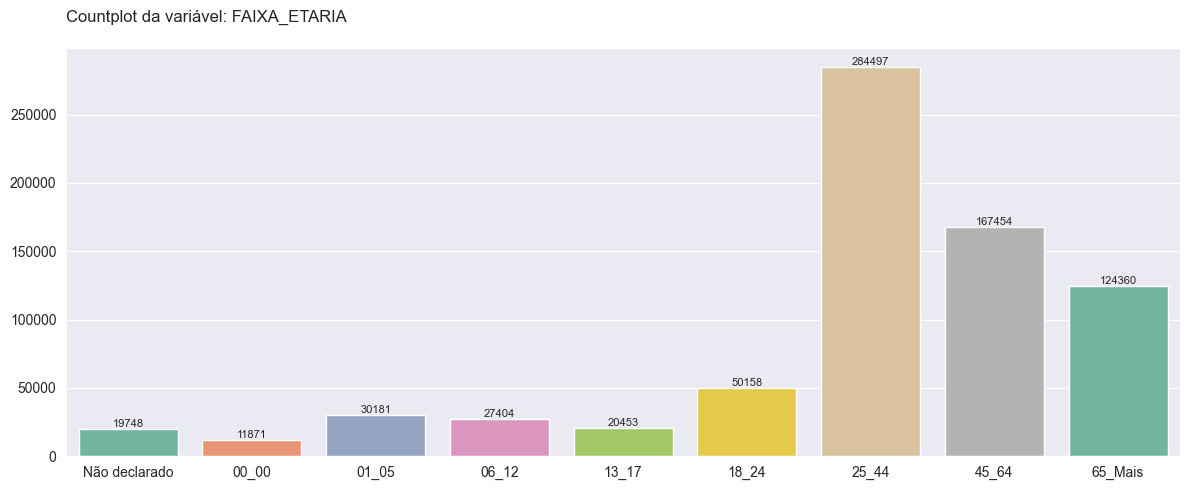

In [117]:
fn.graf_countplot(df, 'FAIXA_ETARIA')


    Recém-nascidos e lactentes: 0 a 1 ano
    Crianças pequenas: 1 a 5 anos
    Crianças em idade escolar: 6 a 12 anos
    Adolescentes: 13 a 17 anos
    Adultos jovens: 18 a 24 anos
    Adultos de meia-idade: 25 a 44 anos
    Adultos de idade avançada: 45 a 64 anos
    Idosos: 65 anos ou mais

* #### Há uma diferença significativa entre pacientes do sexo masculino e feminino?

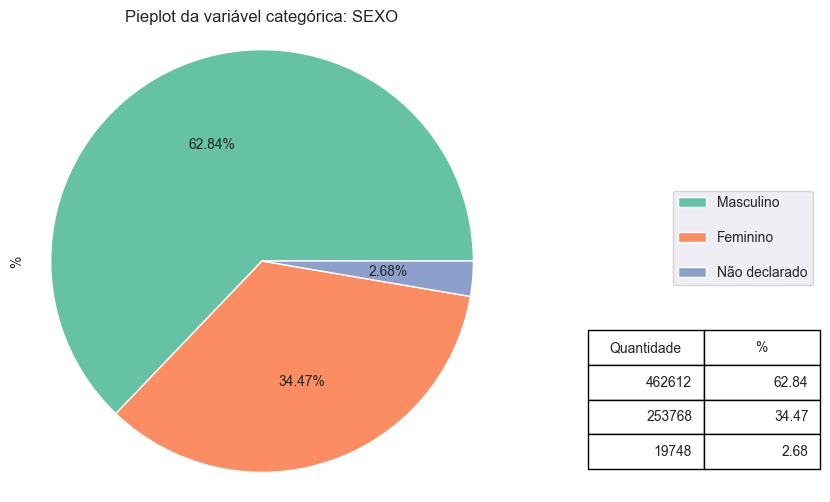

In [118]:
# Calcular as estatísticas diretamente no DataFrame
df_sexo = df['SEXO'].value_counts()
df_sexo_percentual = df_sexo / df_sexo.sum() * 100
df_sexo = pd.DataFrame({'Qtde': df_sexo, '%': df_sexo_percentual})

# Criar gráfico de pizza
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
df_sexo['%'].plot.pie(labels=None, autopct='%0.2f%%', colors=colors, ax=ax)

# Adicionar legendas
legendas = ['Masculino', 'Feminino', 'Não declarado']
ax.legend(legendas, loc='right', labelspacing=1.5,
          bbox_to_anchor=(1.1, 0.1, 0.6, 0.9))

# Adicionar tabela
cell_text = df_sexo.apply(
    lambda x: [f'{int(x["Qtde"]):.0f}', f'{x["%"]:.2f}'], axis=1).tolist()
tabela = plt.table(cellText=cell_text, colLabels=['Quantidade', '%'],
                  loc='bottom right', bbox=(1.2, 0.05, 0.5, 0.3))
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)

# Ajustar layout
plt.axis('equal')
plt.title('Pieplot da variável categórica: SEXO')
plt.show()

* #### Existe uma diferença significativa na idade dos pacientes com base no sexo?

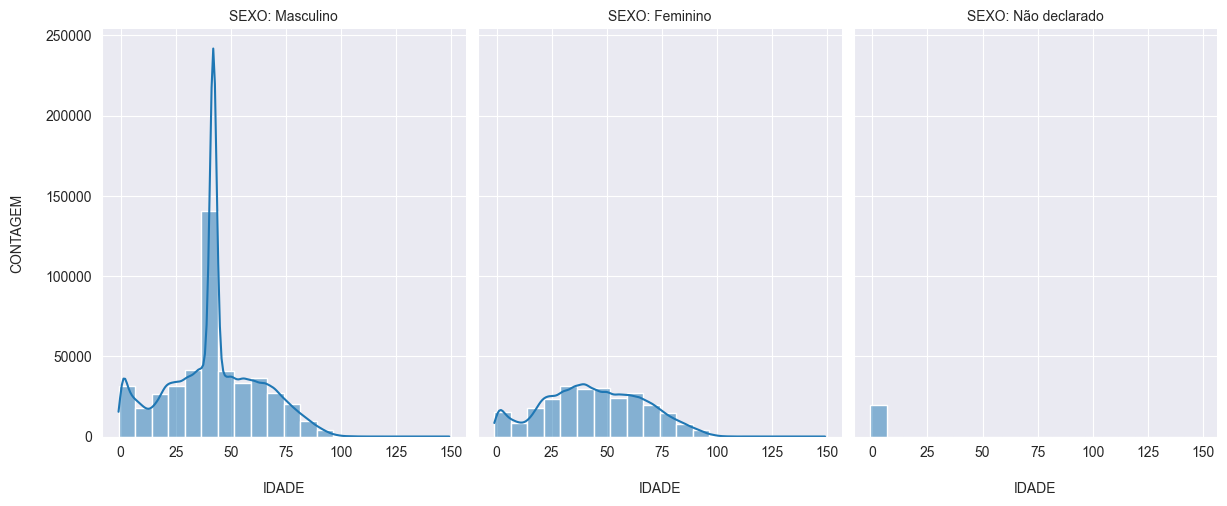

In [119]:
def graf_displot(dataframe, x, col, titulo):
    '''
    Função para gerar gráfico displot.
    
    :param dataframe: DataFrame
        DataFrame contendo os dados.
    :param x: str
        Nome da coluna a ser plotada no eixo x.
    :param col: Series
        Coluna usada para criar subplots.
    :param titulo: str
        Complemento ao título das colunas.
    '''
    # Plotar o gráfico
    plot = sns.displot(data=dataframe, x=x, col=col,
                      kde=True, bins=20)

    # Ajusta o tamanho dos rótulos
    plot.tick_params(labelsize=10)
    # Define rótulos dos eixos x e y
    plot.set_axis_labels(f'\n{x}', 'CONTAGEM\n', size=10)
    # Define os títulos dos subplots
    plot.set_titles(f'{titulo}'': {col_name}', size=10)
    # Define o tamanho da figura
    plot.figure.set_size_inches(12, 5)
    plt.show()


graf_displot(df.loc[df['IDADE'] <= 150], 'IDADE', df['SEXO'], 'SEXO')

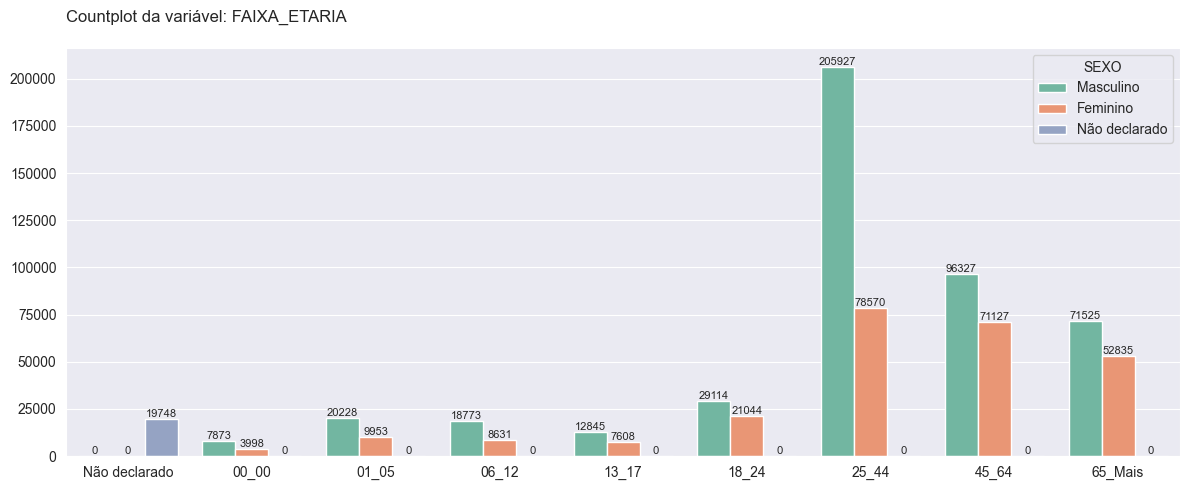

In [120]:
fn.graf_countplot(df, 'FAIXA_ETARIA', 'SEXO')

* #### Quais são os tipos de receituário mais comuns entre os pacientes?

In [121]:
df_tipo_receituario = df.groupby(['TIPO_RECEITUARIO']).size() \
    .reset_index(name='Quantidade').sort_values(by='Quantidade', ascending=False)
df_tipo_receituario = pd.DataFrame(df_tipo_receituario)
df_tipo_receituario['%'] = round(
    df_tipo_receituario['Quantidade'] / df_tipo_receituario['Quantidade'].sum()*100, 2)
df_tipo_receituario

,TIPO_RECEITUARIO,Quantidade,%
4,5,613326,83.32
0,1,103093,14.00
1,2,14531,1.97
3,4,2825,0.38
2,3,2353,0.32


In [122]:
df_tipo_receituario_sexo = df.groupby(['TIPO_RECEITUARIO', 'SEXO']).size()
df_tipo_receituario_sexo = pd.DataFrame(df_tipo_receituario_sexo)
df_tipo_receituario_sexo.rename(columns={0: 'Quantidade'}, inplace=True)
df_tipo_receituario_sexo = df_tipo_receituario_sexo.sort_values(
    by=['TIPO_RECEITUARIO', 'Quantidade'], ascending=False)
df_tipo_receituario_sexo

Quantidade
TIPO_RECEITUARIO SEXO                     
5                Masculino          354270
                 Feminino           245651
                 Não declarado       13405
4                Masculino            2721
                 Feminino               76
                 Não declarado          28
3                Masculino            2217
                 Não declarado         102
                 Feminino               34
2                Masculino           13520
                 Feminino              764
                 Não declarado         247
1                Masculino           89884
                 Feminino             7243
                 Não declarado        5966

* #### Existe alguma correlação entre o tipo de receituário e a idade dos pacientes?

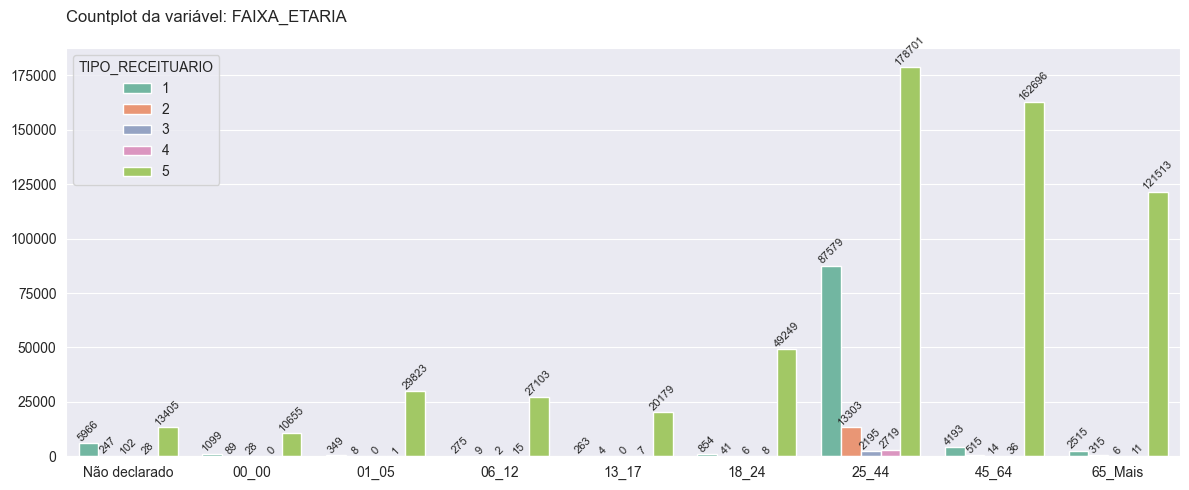

In [123]:
fn.graf_countplot(df, 'FAIXA_ETARIA', 'TIPO_RECEITUARIO', 45)

### 6.2. Distribuição de pacientes por município

* #### Qual é a distribuição em cada município dos pacientes que compram medicamentos controlados?

In [124]:
df_municipio_venda = df['MUNICIPIO_VENDA'].value_counts(
    ascending=False).reset_index()
df_municipio_venda.columns = ['MUNICIPIO_VENDA', 'Quantidade']
df_municipio_venda['%'] = round(
    df_municipio_venda['Quantidade'] / df_municipio_venda['Quantidade'].sum()*100, 2)
df_municipio_venda

,MUNICIPIO_VENDA,Quantidade,%
0,SANTOS,214309,29.11
1,PRAIA GRANDE,126250,17.15
2,SÃO VICENTE,104485,14.19
3,GUARUJÁ,94772,12.87
4,PERUÍBE,44897,6.10
5,ITANHAÉM,42733,5.81
6,CUBATÃO,41301,5.61
7,BERTIOGA,34642,4.71
8,MONGAGUÁ,32739,4.45


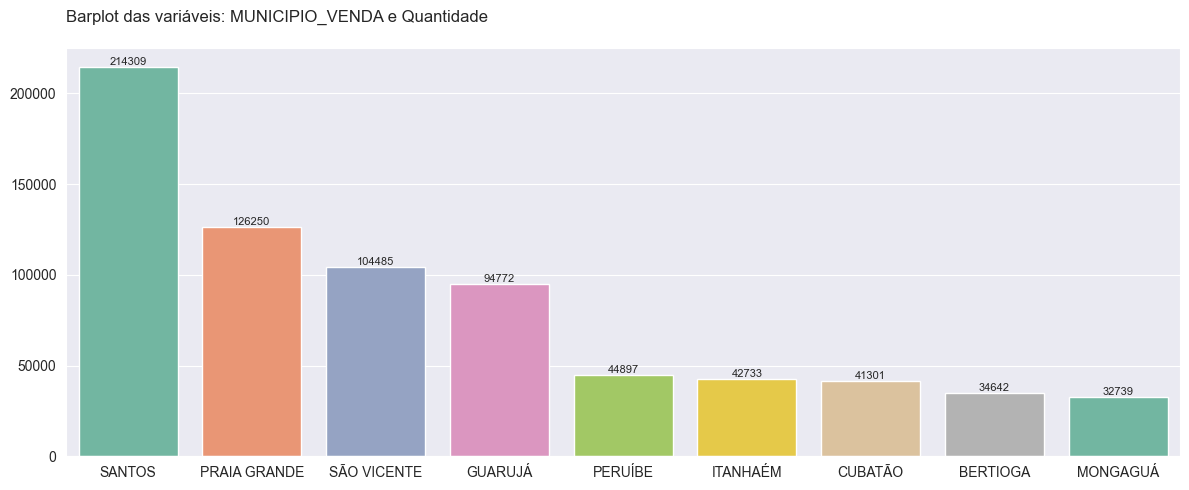

In [125]:
fn.graf_barplot(df_municipio_venda, 'MUNICIPIO_VENDA', 'Quantidade')

* #### Qual é a idade média dos pacientes em cada município?

In [126]:
df_municipio_venda_idade = df.groupby('MUNICIPIO_VENDA')['IDADE'] \
    .mean().sort_values(ascending=False).reset_index()
df_municipio_venda_idade.columns = ['MUNICIPIO_VENDA', 'Idade média']
df_municipio_venda_idade

,MUNICIPIO_VENDA,Idade média
0,SANTOS,45.825446
1,PERUÍBE,41.896996
2,PRAIA GRANDE,41.009436
3,SÃO VICENTE,40.809205
4,MONGAGUÁ,40.566992
5,ITANHAÉM,40.476689
6,CUBATÃO,39.225999
7,GUARUJÁ,38.801518
8,BERTIOGA,38.714602


* #### Quais são as faixas etárias predominantes em cada município?

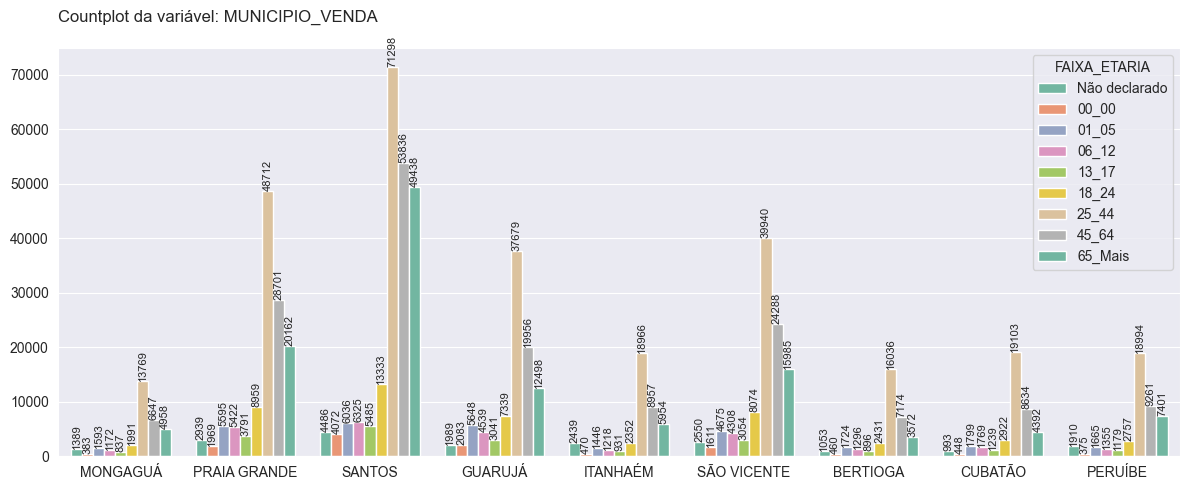

In [127]:
fn.graf_countplot(df, 'MUNICIPIO_VENDA', 'FAIXA_ETARIA', 90)

* #### Qual é a distribuição de sexo e idade dos pacientes em cada município?

In [128]:
df_municipio_venda_idade = df.groupby(['MUNICIPIO_VENDA', 'FAIXA_ETARIA']).size()
df_municipio_venda_idade = pd.DataFrame(df_municipio_venda_idade)
df_municipio_venda_idade.rename(columns={0: 'Quantidade'}, inplace=True)
df_municipio_venda_idade

Quantidade
MUNICIPIO_VENDA FAIXA_ETARIA             
BERTIOGA        Não declarado        1053
                00_00                 460
                01_05                1724
                06_12                1296
                13_17                 896
...                                   ...
SÃO VICENTE     13_17                3054
                18_24                8074
                25_44               39940
                45_64               24288
                65_Mais             15985

[81 rows x 1 columns]

In [129]:
df_municipio_venda_sexo = df.groupby(['MUNICIPIO_VENDA', 'SEXO']).size()
df_municipio_venda_sexo = pd.DataFrame(df_municipio_venda_sexo)
df_municipio_venda_sexo.rename(columns={0: 'Quantidade'}, inplace=True)
df_municipio_venda_sexo = df_municipio_venda_sexo.sort_values(
    by=['MUNICIPIO_VENDA', 'Quantidade'], ascending=False)
df_municipio_venda_sexo

Quantidade
MUNICIPIO_VENDA SEXO                     
SÃO VICENTE     Masculino           68352
                Feminino            33583
                Não declarado        2550
SANTOS          Masculino          125347
                Feminino            84476
                Não declarado        4486
PRAIA GRANDE    Masculino           81092
                Feminino            42219
                Não declarado        2939
PERUÍBE         Masculino           27654
                Feminino            15333
                Não declarado        1910
MONGAGUÁ        Masculino           21436
                Feminino             9914
                Não declarado        1389
ITANHAÉM        Masculino           28018
                Feminino            12276
                Não declarado        2439
GUARUJÁ         Masculino           58537
                Feminino            34246
                Não declarado        1989
CUBATÃO         Masculino           29626
                Feminino            10682
                Não declarado         993
BERTIOGA        Masculino           22550
                Feminino            11039
                Não declarado        1053

### 6.3. Demanda de medicamentos por paciente

* #### Há uma diferença na demanda de medicamentos entre pacientes do sexo masculino e feminino?

In [130]:
df_sexo_qtd_vendida = df.groupby('SEXO')['QTD_VENDIDA'] \
    .sum().sort_values(ascending=False).reset_index()
df_sexo_qtd_vendida.columns = ['SEXO', 'Quantidade vendida']
df_sexo_qtd_vendida['%'] = round(df_sexo_qtd_vendida['Quantidade vendida'] / df_sexo_qtd_vendida['Quantidade vendida'].sum() * 100, 2)
df_sexo_qtd_vendida = pd.DataFrame(df_sexo_qtd_vendida)
df_sexo_qtd_vendida

,SEXO,Quantidade vendida,%
0,Masculino,2963482,84.09
1,Feminino,454683,12.90
2,Não declarado,106090,3.01


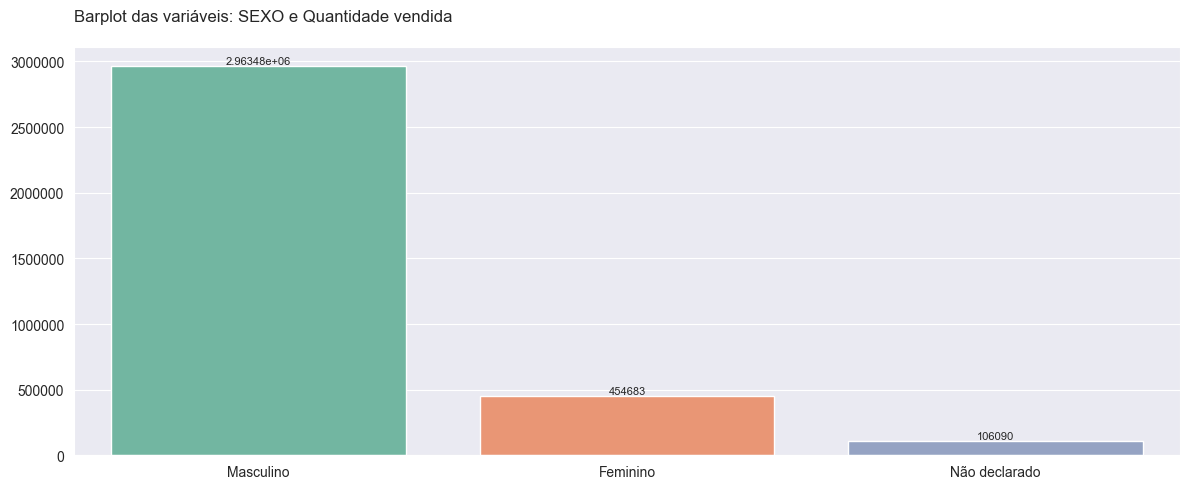

In [131]:
fn.graf_barplot(df_sexo_qtd_vendida, 'SEXO', 'Quantidade vendida')


* #### Qual é a distribuição entre a faixa etária dos pacientes e a quantidade de medicamentos vendidos?

In [132]:
df_faixa_qtd_vendida = df.groupby('FAIXA_ETARIA')['QTD_VENDIDA'] \
    .sum().sort_values(ascending=False).reset_index()
df_faixa_qtd_vendida.columns = ['FAIXA_ETARIA', 'Quantidade vendida']
df_faixa_qtd_vendida['%'] = round(df_faixa_qtd_vendida['Quantidade vendida'] / df_faixa_qtd_vendida['Quantidade vendida'].sum() * 100, 2)
df_faixa_qtd_vendida = pd.DataFrame(df_faixa_qtd_vendida)
df_faixa_qtd_vendida

,FAIXA_ETARIA,Quantidade vendida,%
0,25_44,2582067,73.27
1,45_64,362651,10.29
2,65_Mais,219914,6.24
3,Não declarado,106090,3.01
4,18_24,97486,2.77
5,01_05,55635,1.58
6,06_12,48437,1.37
7,13_17,34641,0.98
8,00_00,17331,0.49


* #### Como a demanda de medicamentos varia em diferentes faixas etárias ao longo do ano?

* #### Além da diferença de idade, existe alguma disparidade na demanda de medicamentos controlados com base no sexo e no tipo de receituário?

* #### Existe uma correlação entre a idade dos pacientes e o tipo de medicamento prescrito?

### 6.4. Demanda de medicamentos por município

    Quais municípios têm a maior demanda por medicamentos controlados?
    Há variações na demanda de medicamentos controlados entre diferentes os municípios?
    Existe uma sazonalidade na demanda de medicamentos em diferentes regiões?
    Qual é a demanda total de medicamentos controlados em cada município?
    Quais medicamentos têm a maior demanda em cada município?

### 6.5. Demanda de medicamentos durante o ano

    Quais são os medicamentos mais demandados?
    Como a demanda de medicamentos varia ao longo dos meses?
    Há meses com picos de vendas de medicamentos?
    Existem picos sazonais na venda de medicamentos controlados?

## 7. Conclusão